# 워드클라우드 (한글)

## #01. 형태소 분석의 이해

### 형태소

- 의미가 있는 최소의 단위(minimally meaningful unit)
- 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
- 일정한 범위 안에서 쓰이는 낱말의 총체

문법적으로 더 이상 나눌 수 없는 언어 요소를 형태소라고 한다.

영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다. (konlpy, mecab 등)

### 형태소 분석 예시

#### 형태소 사전에 수록된 어휘를 기준으로 분석

```plain
사랑하다 = 사랑 + 하 + 다, 사랑하 + 다
알뜰하다 = 알뜰 + 하 + 다, 알뜰하 + 다
```

## #02. KoNLPy(OKT)를 사용한 형태소 분석

KoNLPy는 한국어 정보처리를 위한 파이썬 패키지

자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이 때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지

JAVA를 기반으로 만들어져 있어서 패키지 설치를 위해서는 JAVA 개발 환경이 구성되어 있어야 한다.

### 현재 컴퓨터의 java 환경 구성여부 확인

```shell
$ javac --version
```

설치가 필요한 경우 아래와 같이 에러 메시지가 표시된다.

```plain
'javac'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
```

### OpenJDK 다운로드

권장 버전은 `19`

[https://jdk.java.net/19/](https://jdk.java.net/19/) 페이지에서 자신의 버전에 맞는 파일을 내려 받는다.

다운로드 받은 파일을 적절한 위치에 압축 해제한다.

#### 예

```
C:\jdk-19.0.2
```

### 환경변수 설정

#### 환경변수 입력 화면 열기

1. 폴더창 좌측 트리에서 `내 PC` 마우스 우클릭 하여 `속성` 메뉴 선택
2. `설정`화면이 나타나면 오른쪽에서 `고급 시스템 설정` 클릭
3. 나타난 화면 하단의 `환경 변수` 버튼 클릭

#### `JAVA_HOME` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `새로 만들기` 버튼 클릭
2. 변수 이름에 `JAVA_HOME`
3. 변수 값에 JDK의 경로 입력
    - 예: `C:\jdk-19.0.2`
4. `확인`을 눌러 입력창 닫기

#### `Path` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `Path` 항목을 찾아 선택하고 `편집`버튼 클릭
2. 맨 아래 빈 행을 더블클릭 하여 입력 상태로 만들고 JDK 설치 폴더 내의 `bin` 디렉토리까지의 경로를 입력
    - 예: `C:\jdk-19.0.2\bin`
3. `확인`을 눌러 모든 창 닫기

명령 프롬프트, 폴더창, VSCode 등 모든 프로그램을 닫은 후 명령 프롬프트에서 `javac --version` 명령으로 설정이 잘 되었는지 확인

### 형태소 분석 설치

`konlpy` 패키지 설치가 필요하다.

### 형태소 분석 테스트

#### 패키지 참조

In [1]:
from konlpy.tag import Okt

#### 형태소 분석 객체 생성

In [2]:
nlp = Okt()

In [3]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(sample)
print(nouns)

['개봉', '때', '지금', '마음', '때', '이영화', '그때', '심', '위로', '영화', '장면', '하나', '하나', '마음', '남아', '여운', '영화']


#### 사전 구축 하기

##### konlpy의 설치 경로 확인

In [4]:
import konlpy
konlpy.data.path

['C:\\Users\\hanjieun_2/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Users\\hanjieun_2\\AppData\\Local\\Programs\\Python\\Python311\\konlpy_data',
 'c:\\Users\\hanjieun_2\\AppData\\Local\\Programs\\Python\\Python311\\lib\\konlpy_data',
 'C:\\Users\\hanjieun_2\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\hanjieun_2\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\konlpy/data']

출력되는 마지막 경로의 상위 폴더가 `konlpy`의 설치 위치로 확인됨

> 컴퓨터마다 다를 수 있음

`konlpy`의 설치 위치 하위의 `java` 라는 이름의 폴더에서 `open-korean-text-2.1.0.jar` 파일의 압축을 해제

압축을 해제한 폴더 안에서 `names.txt` 파일을 찾는다.

```
.\open-korean-text-2.1.0\org\openkoreantext\processor\util\noun
```

`txt` 파일이 위치하는 폴더 안에 임의의 텍스트 파일을 영문이름, 공백금지, UTF-8 형태로 생성하고 그 안에 새로운 단어들을 줄바꿈으로 구분하여 나열한다.

`open-korean-text-2.1.0` 폴더 위치에서 명령 프롬프트를 열고 아래의 명령으로 jar 압축을 수행

```java
$ jar cvf open-korean-text-2.1.0.jar .
```

> 마지막에 현재 폴더를 의미하는 `.` 주의

생성된 jar 파일을 기존의 파일과 교체한다. (VSCode 종료 후 파일 교체 해야 함)

## #03. 한글 워드 클라우드

### 패키지 참조

`kolnpy`는 앞에서 이미 참조했으므로 생략

In [6]:
from wordcloud import WordCloud

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

from IPython.display import Image, display

import sys
import os

# 직접 구현한 모듈 (helper.py)
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import clearStopwords

### 분석할 데이터 가져오기

In [7]:
with open("wordcloud/대한민국헌법.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    print(text)

대한민국헌법
[시행 1988. 2. 25] [헌법 제10호, 1987. 10. 29, 전부개정]

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 
       제1장 총강 
제1조 ①대한민국은 민주공화국이다.
  ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
제2조 ①대한민국의 국민이 되는 요건은 법률로 정한다.
  ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
제5조 ①대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
  ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
제6조 ①헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
  ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
제7조 ①공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
  ②공무원의 신분과 정치적 중립성은 법률이 정하는 바

### 데이터에 대한 형태소 분석

In [8]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(text)
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

### 리스트로부터 빈도수 측정

In [9]:
count = Counter(nouns)
count

Counter({'제': 176,
         '법률': 127,
         '정': 89,
         '수': 88,
         '대통령': 83,
         '국가': 73,
         '국회': 68,
         '국민': 61,
         '관': 58,
         '때': 55,
         '헌법': 53,
         '그': 47,
         '이': 38,
         '모든': 37,
         '바': 37,
         '위': 36,
         '기타': 26,
         '및': 25,
         '사항': 23,
         '권리': 21,
         '안': 21,
         '의원': 21,
         '자유': 20,
         '정부': 20,
         '선거': 20,
         '임명': 20,
         '직무': 19,
         '국무총리': 19,
         '경제': 18,
         '의무': 18,
         '조직': 18,
         '국회의원': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '이상': 17,
         '국무위원': 17,
         '대법원': 17,
         '범위': 16,
         '장': 15,
         '법관': 15,
         '보호': 14,
         '정책': 14,
         '정당': 14,
         '헌법재판소': 14,
         '재적': 14,
         '회의': 14,
         '항의': 14,
         '관리': 14,
         '노력': 13,
         '보장': 13,
         '

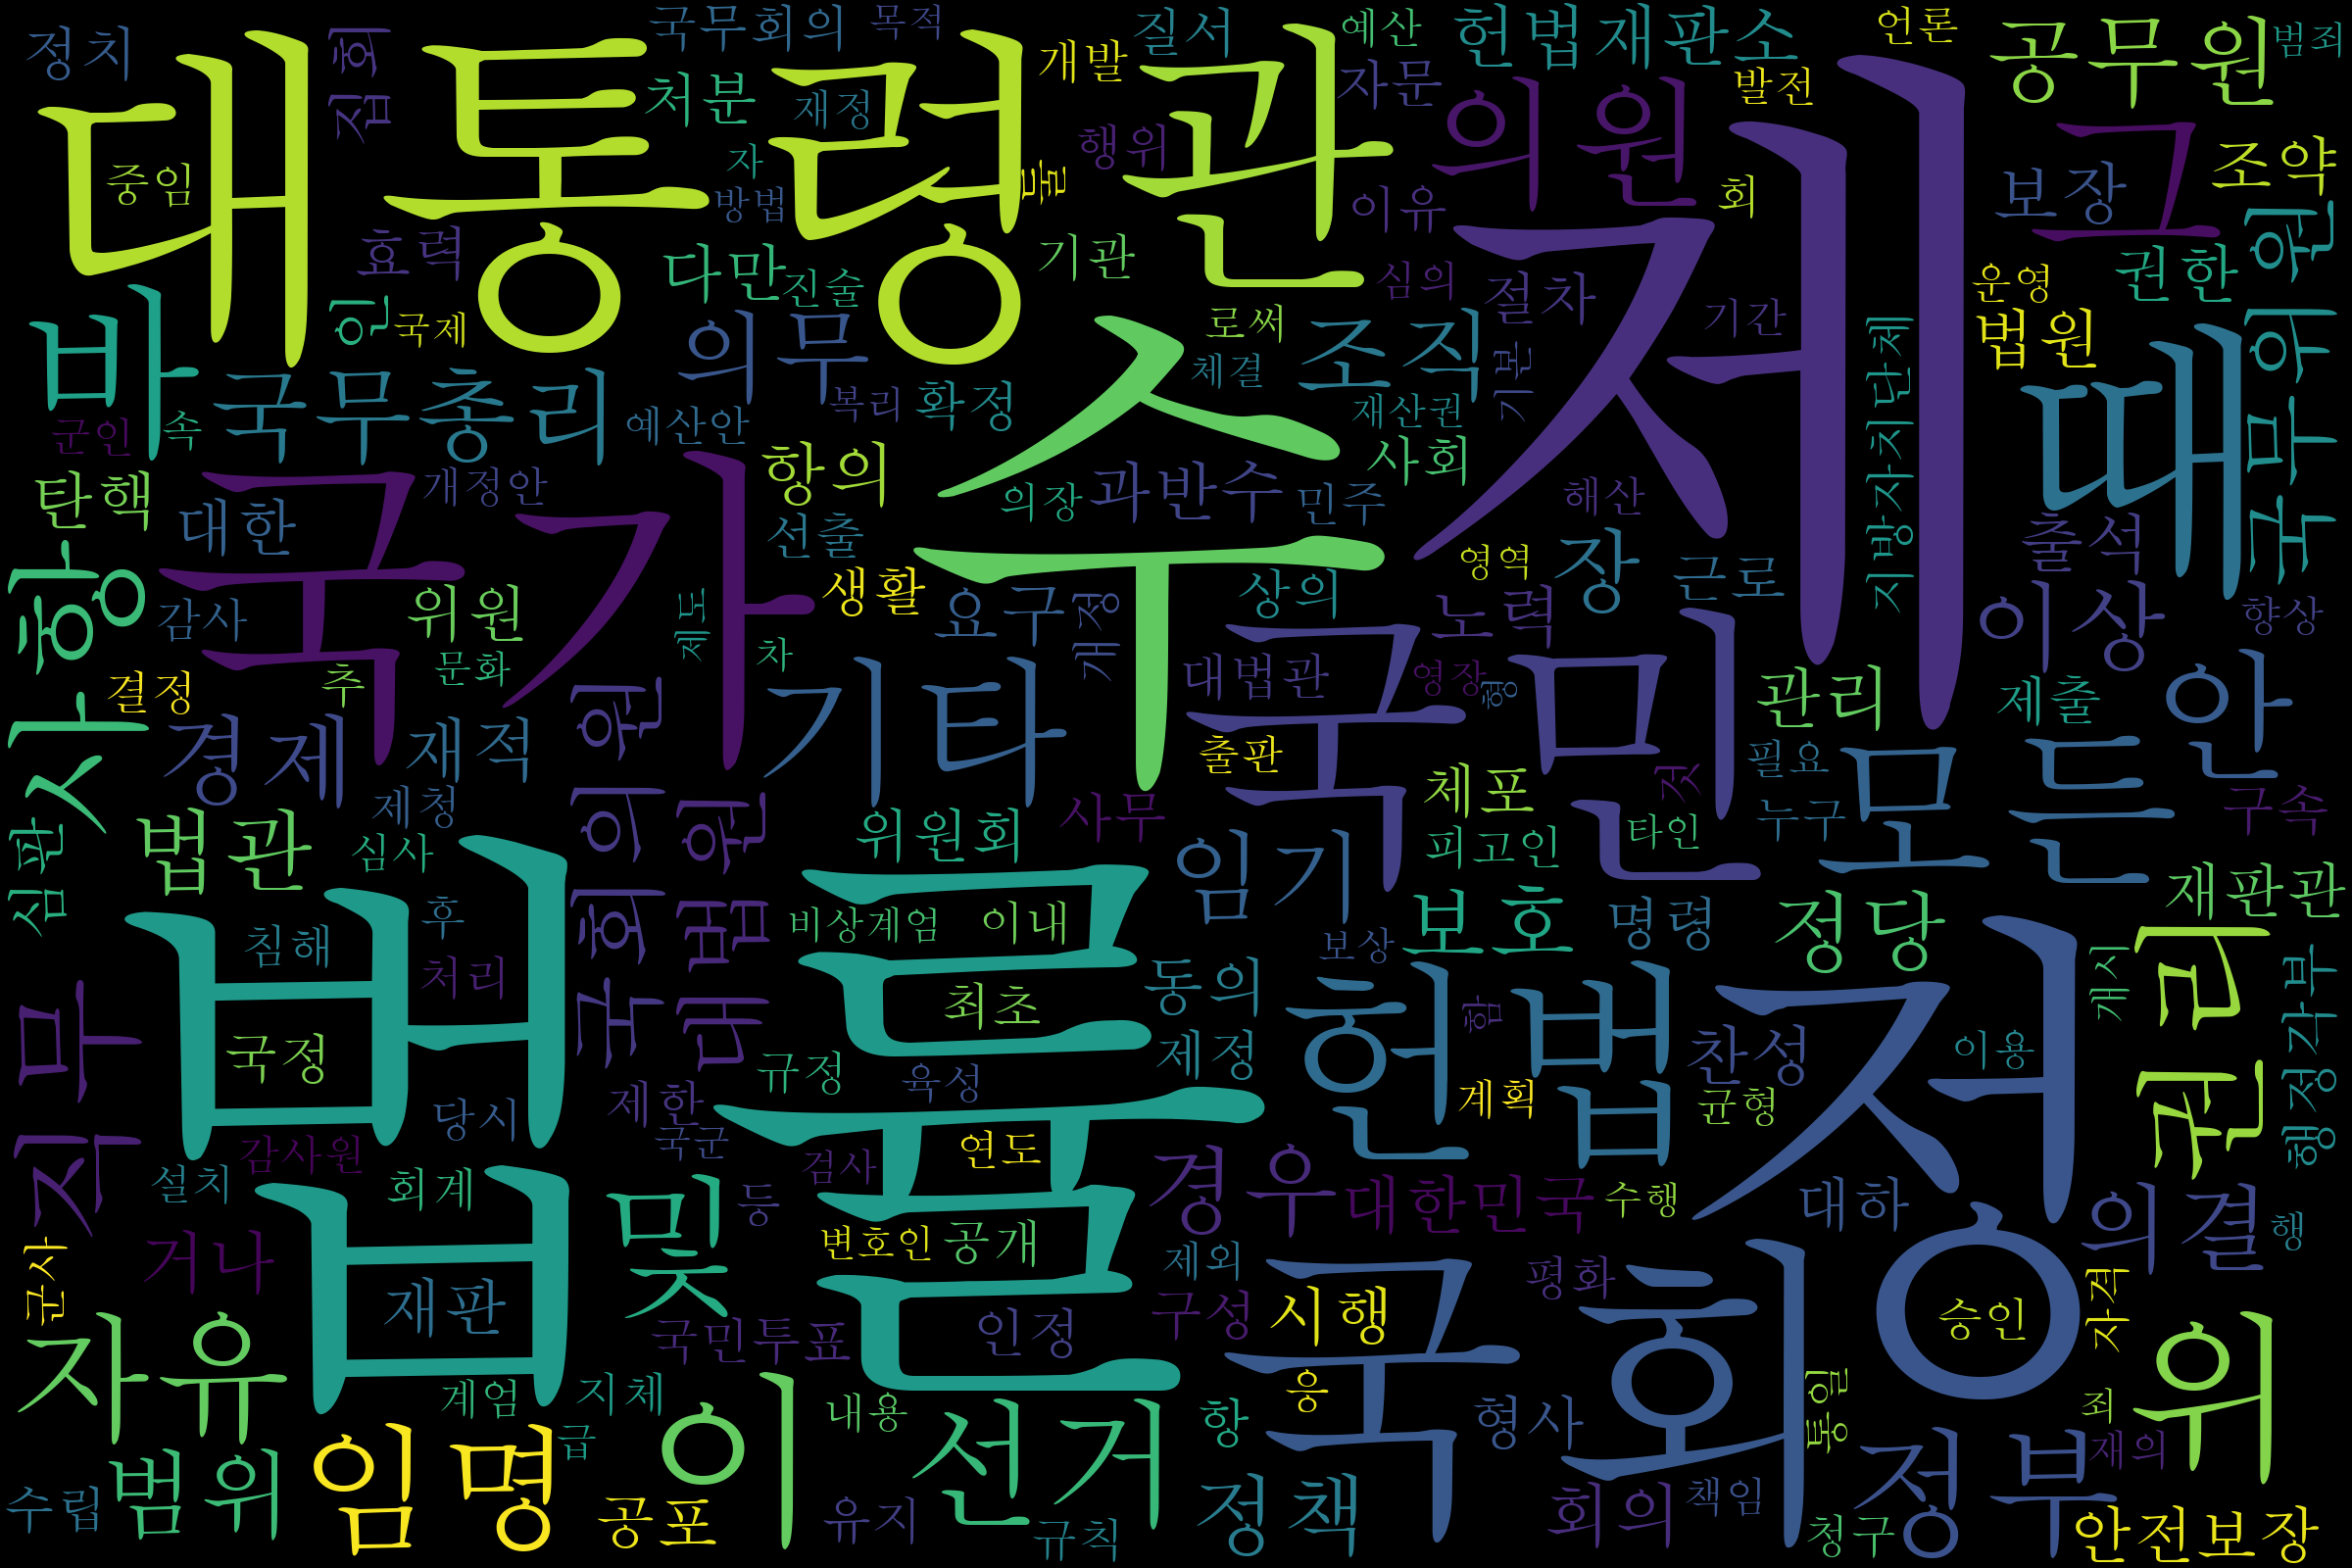

In [10]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/batang.ttc", width=1200, height=800, scale=2.0)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
display(Image(filename='대한민국헌법-주요단어.png'))

#### (추가) 불용어 목록 가져오기

In [11]:
with open('wordcloud/stopwords-ko.txt','r',encoding='utf-8') as f:
    stopwords = f.readlines()

    for i,v in enumerate(stopwords):
        stopwords[i] = v.strip()

    # print(stopwords) => 리스트

#### 데이터에 대한 형태소 분석

In [12]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(text)
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

#### (추가) 추출된 명사에서 불용어를 제거함

In [13]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

# print(data_set) => stopwords가 없는 명사만 출력된다. 

#### (추가) 추출된 명사에서 불용어를 제거함

In [14]:
data_set = clearStopwords(nouns)
data_set

['대한민국',
 '헌법',
 '시행',
 '헌법',
 '호',
 '개정',
 '유구',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '다짐',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '정',
 '국가',
 '법률',
 '정',
 '바',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '

#### (추가) helper.py `불용어제거` 모듈 테스트

In [15]:
data_set = clearStopwords(nouns)
#data_set

#### 워드클라우드 만들기

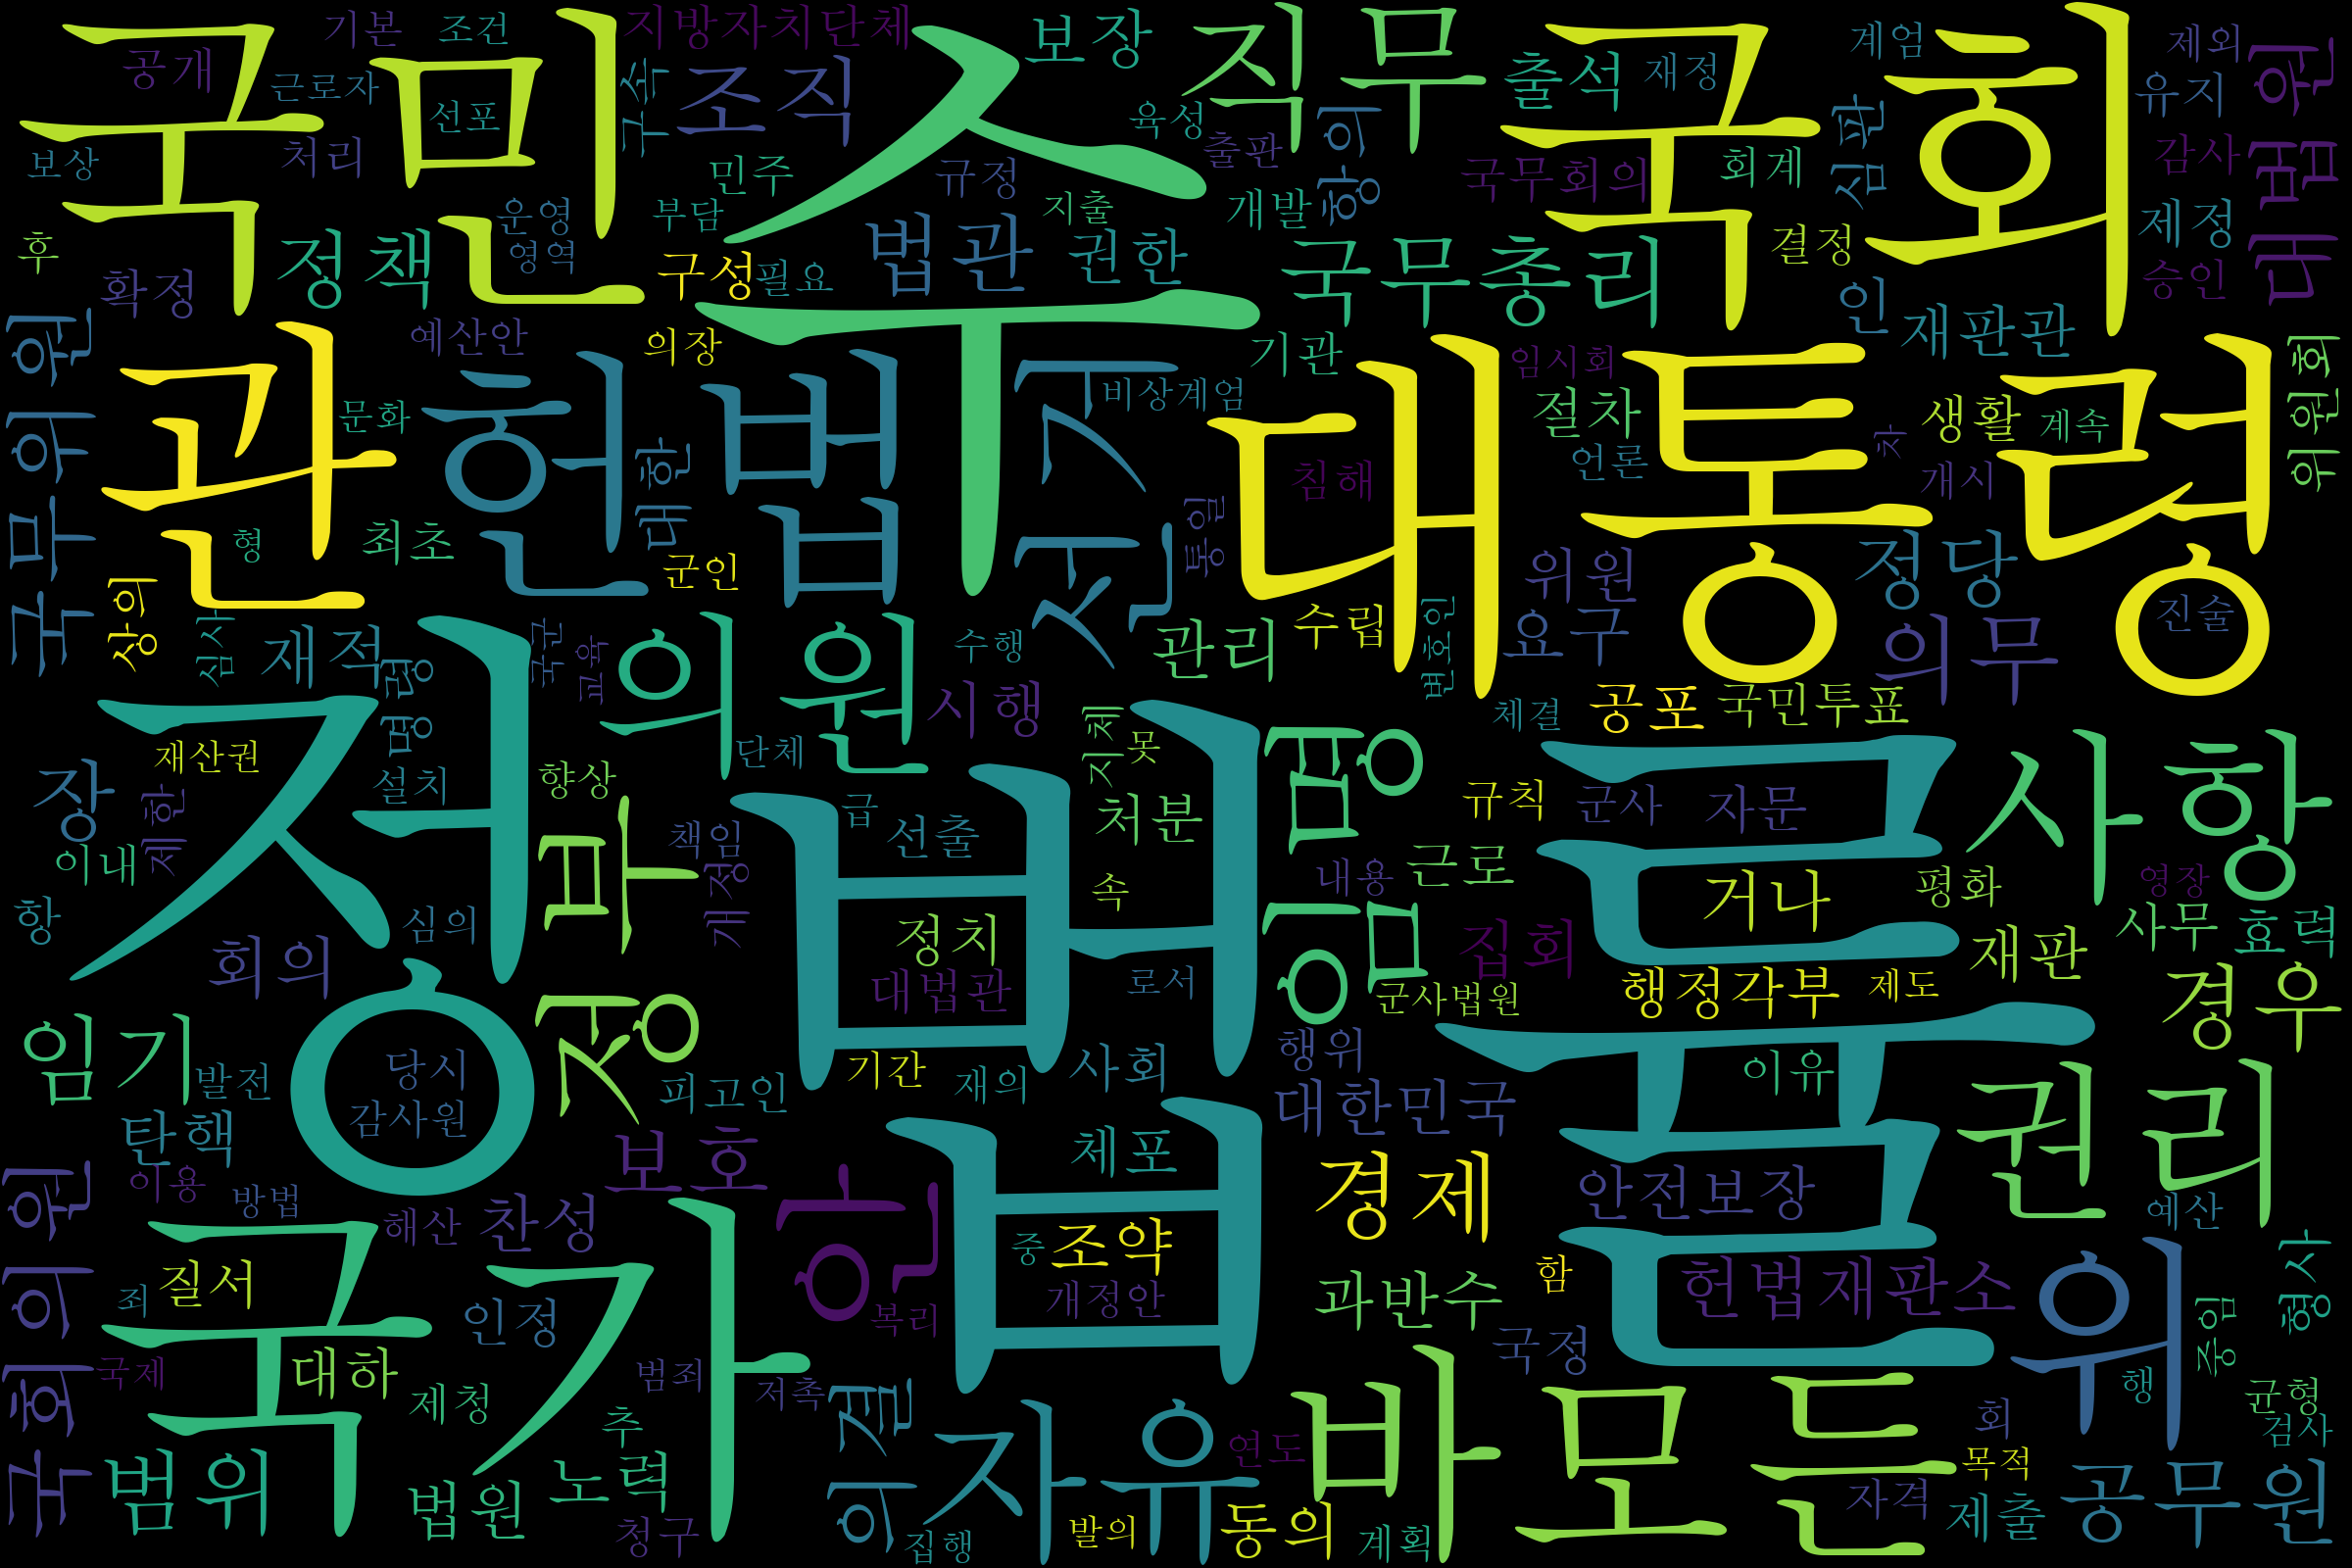

In [16]:
# 리스트로 부터 빈도수 측정
count = Counter(data_set)
#count
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/batang.ttc", width=1200, height=800, scale=2.0)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
display(Image(filename='대한민국헌법-주요단어.png'))